# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 
from scipy import integrate

/home/kevin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

simulated mean probability is: [ 0.0658  0.1264  0.1953  0.253   0.3169  0.381   0.441   0.5083  0.5718
  0.6287]
simulated standard deviation is: [ 0.02388221  0.03629105  0.04316144  0.04355456  0.04644771  0.04515529
  0.05109795  0.04677724  0.04332159  0.04813845]


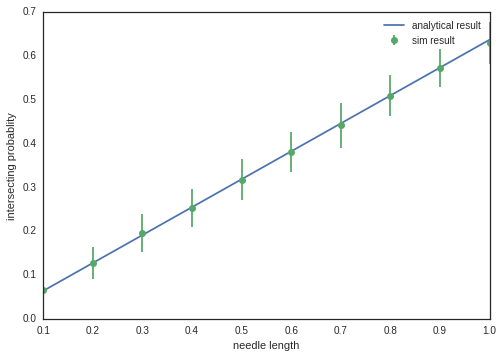

In [4]:
#python script to estimate the probablity of the needle intersects the line

#number of samples
N_total = 100;

#number of simulations to calculate mean and std
num_sim = 100;

#needle length
needle_length = np.arange(0.1,1.1,0.1)

#probability
sim_result = np.zeros(needle_length.shape,dtype='float')
sim_std = np.zeros(needle_length.shape,dtype='float')

#analytical solution
ana_result = 2 * needle_length / (1.0 * np.pi)

#loop through all needle length
for ind, length in enumerate(needle_length):  
    
    local_result = np.zeros(num_sim,dtype='float')
    for i in np.arange(num_sim):
        #generate random numbers  
        X =     np.random.uniform(low=0,high=1/2.0,size=N_total)
        theta = np.random.uniform(low=0,high=np.pi/2.0,size=N_total)
   
        #determine if intersects
        is_intersect =  (X/np.sin(theta) <= length/2.0) 
    
        #sum up number of intersects
        N_intersect = np.sum(is_intersect)
    
        local_result[i] = N_intersect/float(N_total)
        
    #record the probablity
    sim_result[ind] = np.mean(local_result)
    sim_std[ind]=np.std(local_result)

    
#plot solution    
plt.plot(needle_length,ana_result, label = 'analytical result') 
plt.errorbar(needle_length,sim_result, yerr = sim_std, fmt= 'o', label = 'sim result')

plt.xlabel('needle length')
plt.ylabel('intersecting probablity')
plt.legend()
    
print 'simulated mean probability is:' ,sim_result
print 'simulated standard deviation is:' ,sim_std
#for ind, i in enumerate(needle_length):
#    print ind,i
  

## needle length exceeds t

The formula $ P = \frac{2l}{t\pi}$ is only accurate if needle length l < t. Here we set t = 1 for simplicity. Rigorously, the integral is given by 
$$ \begin{gather*} 
P = \int_{\theta=0} ^{\pi/2} \int_{x=0} ^{\min(l/2\sin\theta, 1/2)} \frac{4}{\pi}dxd\theta \\
P = \frac{4}{\pi} \Big( \int_{\theta=0} ^{\theta=\theta^*} l/2\sin\theta d\theta + \int_{\theta=\theta^*} ^{\theta=\pi/2} \frac{1}{2} d\theta\Big)\\
P = \frac{2}{\pi}(l-\sqrt{l^2-1}) + 1 - \frac{2}{\pi}\sin^{-1}\frac{1}{l}
\end{gather*}
$$
where $\theta^* = \sin^{-1}\frac{1}{l}$.

This formula is true is l>t=1. The following section compares the simulation result with the analytical result. Both the simulation mean and the standard deviation are shown on the plot. 


[ 0.06366198  0.12732395  0.19098593  0.25464791  0.31830989  0.38197186
  0.44563384  0.50929582  0.5729578   0.63661977  0.68210122  0.71451694
  0.74006891  0.76101367  0.77860806  0.79365171  0.80669191  0.8181216
  0.82823281  0.83724842]
simulated mean probability is: [ 0.0636  0.1269  0.194   0.2512  0.3135  0.3876  0.4418  0.5124  0.5746
  0.6367  0.6822  0.7084  0.7333  0.7647  0.7781  0.7982  0.8027  0.8187
  0.8268  0.8359]
simulated standard deviation is: [ 0.02512051  0.03375485  0.03690528  0.04174398  0.05038601  0.04632753
  0.0400095   0.05274694  0.0426713   0.04427313  0.04685253  0.04509368
  0.04494563  0.04288251  0.04700415  0.04217535  0.04192505  0.03775328
  0.03619061  0.03927073]


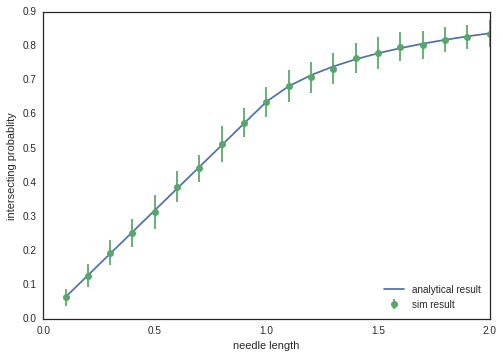

In [5]:
#python script to estimate the probablity of the needle intersects the line

#number of samples
N_total = 100;

#number of simulations to calculate mean and std
num_sim = 100;

#needle length
needle_length = np.arange(0.1,2.1,0.1)

#probability
sim_result = np.zeros(needle_length.shape,dtype='float')
sim_std = np.zeros(needle_length.shape,dtype='float')

#analytical solution
ana_result = 2 * needle_length / (1.0 * np.pi)
ana_result[10:] = 2/np.pi * (needle_length[10:] - np.sqrt(needle_length[10:]**2-1)) + \
                  1 - 2/np.pi*np.arcsin(float(1)/needle_length[10:])
print ana_result

#loop through all needle length
for ind, length in enumerate(needle_length):  
    
    local_result = np.zeros(num_sim,dtype='float')
    for i in np.arange(num_sim):
        #generate random numbers  
        X =     np.random.uniform(low=0,high=1/2.0,size=N_total)
        theta = np.random.uniform(low=0,high=np.pi/2.0,size=N_total)
   
        #determine if intersects
        is_intersect =  (X/np.sin(theta) <= length/2.0) 
    
        #sum up number of intersects
        N_intersect = np.sum(is_intersect)
    
        local_result[i] = N_intersect/float(N_total)
        
    #record the probablity
    sim_result[ind] = np.mean(local_result)
    sim_std[ind]=np.std(local_result)

    
#plot solution    
plt.plot(needle_length,ana_result, label = 'analytical result') 
plt.errorbar(needle_length,sim_result, yerr = sim_std, fmt= 'o', label = 'sim result')

plt.xlabel('needle length')
plt.ylabel('intersecting probablity')
plt.legend(loc=4)
    
print 'simulated mean probability is:' ,sim_result
print 'simulated standard deviation is:' ,sim_std
#for ind, i in enumerate(needle_length):
#    print ind,i

# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


**Please answer this problem by adding cells here.**

## Simple MC integration ##
We integrate the integrals using the simple MC method. First,we sample uniformly in the integration interval. Next, we evaluate the function, find the mean of all estimates and multiply by the support. We repeat the integration in the for loop for better estimate the mean and to compute the estimation variance. Please refer to the attached code for implementation details and results. 

We further compare our result with the python default integration package quad. The python values are also reported. Rigorously, the second integral is an integral on the principal part, since the function is undefined at the 2 interval boundaries. 

In [6]:
#simple MC integration
def estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries):
    
    #precondition, lower_bound< < upper_bound
    if lower_bound >= upper_bound:
        print "warning: lower bound is not smaller than upper bound !"
        return 0.0, 0.0
    
    #initialize solution vector
    results = np.zeros(number_of_tries,dtype='float')
    
    for i in xrange(number_of_tries):
        #generate random samples
        X = np.random.uniform(low = lower_bound, high = upper_bound, size = number_of_samples)
        
        #compute f(X)
        Y = function_to_integrate(X)
        
        #estimate value of the integral
        results[i] = (upper_bound - lower_bound) * np.sum(Y)/float(number_of_samples)
        
    mean_value = np.mean(results)
    std_value = np.std(results)
    
    #return solution
    return mean_value, std_value

#test cases
def f(x):
    return x**2 + 4 *x * np.sin(x)

#homework case 1 
def g(x):
    return x**(x/4)

#homework case 2
def h(x):
    return np.log(x) * np.log(1-x)

if __name__ == '__main__':
    #define number of tries and number of samples
    number_of_samples = 1000
    number_of_tries = 1000
    
    #mean,std = estimate_integral_MC(f, 2, 3, number_of_samples, number_of_tries)
    
    #case 1:
    mean,std = estimate_integral_MC(g, 0, 3, number_of_samples, number_of_tries)
    true_val = integrate.quad(g,0,3)
    print "the integral value estimate is: ", mean, ", the standard deviation is ", std, ", with ", number_of_tries, \
          " tries and ", number_of_samples, " samples"
    print "python quad value is: ", true_val[0], "\n"

    #case 2:
    mean,std = estimate_integral_MC(h, 0, 1, number_of_samples, number_of_tries)
    true_val = integrate.quad(h,0,1)
    print "the integral value estimate is: ", mean, ", the standard deviation is ", std, ", with ", number_of_tries, \
          " tries and ", number_of_samples, " samples"
    print "python quad value is: ", true_val[0], "\n"

the integral value estimate is:  3.91581867546 , the standard deviation is  0.0388506039898 , with  1000  tries and  1000  samples
python quad value is:  3.91570013179 

the integral value estimate is:  0.355121037112 , the standard deviation is  0.00385912820628 , with  1000  tries and  1000  samples
python quad value is:  0.355065933152 



# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

## Simple MC in multiple dimension ##
Here we use simple MC to estimate the remaining donut volume. The integration domain is choosen to be 
$$ x \in [-6,1], y \in [-3, 6], z \in [-2, 2] $$
We sample uniformly in this bounding volume and use the checking condition:
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$

We found the remaining volume is $138.89\pm1.25$ unit^3, which is about 44% of the original volume.

remaining donut volume is:  138.86651268 with std =  1.24726606097 using  10000 samples and  10000 tries
original donut volume is:  315.827340835
the percentage left is:  43.9691232282 %


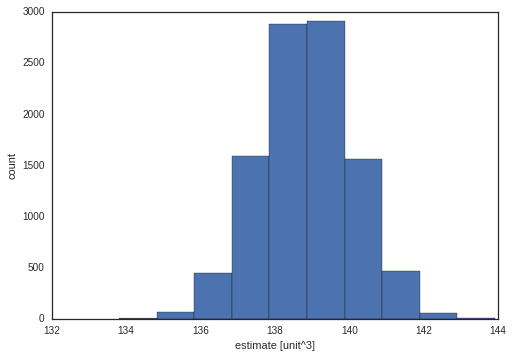

In [7]:
#estimate percentage of donut left through simple MC integration
if __name__ == '__main__':
    
    #define xmin,ymin,zmin,xmax,ymax,zmax --> these are bounding box dimensions
    xmin = -6; xmax = 6
    ymin = -6; ymax = 6
    zmin = -2; zmax = 2
    
    #number of tries, and number of samples
    num_tries =10000;
    num_samples = 10000;
    
    #define a and c
    c= 4; a=2
    
    #define cut location
    xcut = 1; ycut=-3;
    
    #initialize result array
    results = np.zeros(num_tries,dtype = 'float')
    
    #loop to estimate variance
    for i in xrange(num_tries):
        X= np.random.uniform(low = xmin, high = min(xmax,xcut), size = num_samples)
        Y= np.random.uniform(low = max(ymin,ycut), high = ymax, size = num_samples)
        Z= np.random.uniform(low = zmin, high = zmax, size = num_samples)
        
        #check if the points are in the donut
        in_donut = Z**2 + (np.sqrt(X**2+Y**2)-c)**2 <= a**2

        support = (min(xmax,xcut) - xmin) * (ymax - max(ymin,ycut)) * (zmax - zmin) 
        results[i] = np.sum(in_donut)/float(num_samples) * support
        
    #report solution and variance
    mean = np.mean(results)
    std = np.std(results)
    print "remaining donut volume is: ", mean ,"with std = ", std, "using ",num_samples,"samples and ",num_tries,"tries"
    
    #compute original volume
    donut_vol = np.pi * a**2 * 2* np.pi * c
    print "original donut volume is: ", donut_vol
    
    #report fraction
    print "the percentage left is: ", mean / donut_vol * 100, "%"
    
    plt.hist(results,bins=10)
    plt.xlabel('estimate [unit^3]')
    plt.ylabel('count')
    

# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

normalization factor lambda is:  0.39203851592
Total samples drawn:  25861
Number of accepted samples:  10000


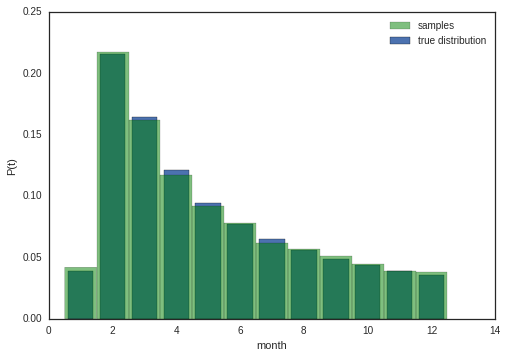

In [8]:
#plot the distribution

#assume input x is integer input
def P(s,t):
    result = s*(t-0.9)/((t-1)**2+1)
    result[(t<1) | (t>12)]=0
    return result

if __name__ == '__main__':
    t = np.arange(1,13,1);
    val = P(1,t)
    
    #1. find normalization factor
    normalization = float(1) / np.sum(val)
    print "normalization factor lambda is: ", normalization
    
    val = P(normalization,t)
    plt.bar(t,val,align='center',label= 'true distribution')
    plt.xlabel('month')
    plt.ylabel('P(t)')
    
    #2. sample using rejection sampling
    y_max = max(val)
    
    N= 10000
    accepted = 0
    samples = np.zeros(N)
    count = 0
    bins = np.arange(0.5,13.5,1.0)
    
    start = time.time()
    while (accepted < N):
        
        #pick uniform number in x and y
        x = np.random.randint(1,13,size=1) 
        y = np.random.uniform(0,y_max,size=1)
        
        #accept/reject checking
        if y < P(normalization, x):
            samples[accepted] = x
            accepted += 1
        count += 1
    rs_sample_time = time.time() - start
    
    print "Total samples drawn: ", count
    print "Number of accepted samples: ", accepted
    
    #3 histogram comparison
    plt.hist(samples, bins, label = 'samples',color = 'green', alpha=0.5, normed=True, align='mid')
    plt.legend()
    

time spent by rejection sampling method is:  0.234008073807
time spent by inverse method is:  0.0149390697479


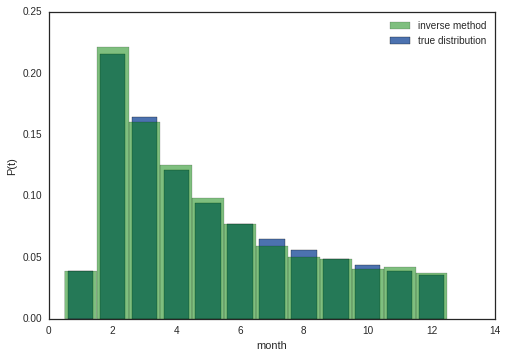

In [9]:
#4: sampling by inverse method (lookup table)

def look_up_tabel_invCDF(CDF,x):
    results = np.zeros(x.size)
    for i in xrange(x.size):
        results[i] = np.argmin(CDF < x[i])+1
    return results

if __name__ == '__main__':
    
    #construct lookup tabel
    #compute CDF
    CDF = np.cumsum(val)
    
    #sample uniformly in [0,1]
    start= time.time()
    R = np.random.uniform(0,1,N)
    Xinv = look_up_tabel_invCDF(CDF,R)
    inverse_time = time.time()-start;
    
    #plot the solution
    plt.bar(t,val,align='center',label= 'true distribution')
    plt.xlabel('month')
    plt.ylabel('P(t)')
    plt.hist(Xinv, bins, label = 'inverse method',color = 'green', alpha=0.5, normed=True, align='mid')
    plt.legend()
    
    #5. compare execution time
    print "time spent by rejection sampling method is: ", rs_sample_time
    print "time spent by inverse method is: ", inverse_time
    


# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$ g_1(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1 $ 

$ g_2(x,y) = -(x-0.4)^2 - (y-0.4)^2 + 0.05$, and

$ f(x,y) = \max(g_1(x,y), 0) + max(g_2(x,y),0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**

This function consists of 2 non-overlapping integrals of paraboloid. The first paraboloid is centered at (-0.4,-0.4) with radius $\sqrt{0.1}$ and height 0.1. The second paraboloid is centered at (0.4,0.4) with radius $\sqrt{0.05}$ and height 0.05. The integral value can be obtained as 

$\int_{A}f(x,y)dxdy = \frac{1}{2}\pi a_1^2 h_1 + \frac{1}{2}\pi a_2^2 h_2 = 0.0625\pi $

python numerical integration = 0.019634784421


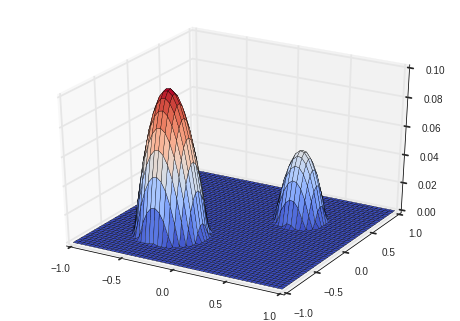

In [59]:
#solve using python's default method

#define the function f(x)
def f(x,y):
    g1 = -(x+0.4)**2 - (y+0.4)**2 + 0.1 
    g2 = -(x-0.4)**2 - (y-0.4)**2 + 0.05
    return np.maximum(g1,np.zeros(x.shape,dtype = 'float')) + np.maximum(g2,np.zeros(x.shape,dtype = 'float'))

def f_scalar(x,y):
    g1 = -(x+0.4)**2 - (y+0.4)**2 + 0.1 
    g2 = -(x-0.4)**2 - (y-0.4)**2 + 0.05
    return max(g1,0) + max(g2,0)

if __name__ == '__main__':
    #visualize the function
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    x = np.linspace(-1,1,50)
    y = np.linspace(-1,1,50)
    xv,yv = np.meshgrid(x,y)
    zv = f(xv,yv)
    ax.plot_surface(xv,yv,zv,rstride = 1, cstride = 1, cmap = matplotlib.cm.coolwarm)
    
    #use python package dblquad for integration
    python_sol = integrate.dblquad(lambda x,y: f_scalar(x,y),-1,1, lambda y: -1, lambda y: 1)
    print "python numerical integration =", python_sol[0]
    

In [64]:
#solve by basic MC
#simple MC integration
def estimate_dblint_MC(function_to_integrate, lx, ux , ly, uy, number_of_samples, number_of_tries):
    
    #initialize solution vector
    results = np.zeros(number_of_tries,dtype='float')
    
    for i in xrange(number_of_tries):
        #generate random samples
        X = np.random.uniform(low = lx, high = ux, size = number_of_samples)
        Y = np.random.uniform(low = ly, high = uy, size = number_of_samples)
        xv,yv = np.meshgrid(X,Y)
        #compute f(X)
        Z = function_to_integrate(xv,yv)
        
        #estimate value of the integral
        results[i] = (ux - lx) * (uy - ly) * np.sum(Z)/float(number_of_samples**2)
        
    mean_value = np.mean(results)
    std_value = np.std(results)
    
    #return solution
    return mean_value, std_value

if __name__ == '__main__':
    num_samples = 500;
    num_tries = 100;
    simple_mc_val, simple_mc_result = estimate_dblint_MC(f,-1,1,-1,1,num_samples,num_tries)
    print "simple MC estimates = ", simple_mc_val, "with std = ", simple_mc_result

simple MC estimates =  0.0196160679849 with std =  0.00188558046359
